# Welcome to Glitch the Climate. 


We stand at a precipice. In front of us, a steep slope rolls down into a wide gorge, the ground obscured by fog and the other side barely visible. Behind us we can hear the roaring of a beast we built with our two hands. As vertigo takes hold, we slip and stumble near the edge, and we are unsure if we are falling or if we are about to. The ground is a long way down. A long way down.

Climate change is a global phenomena, but its impacts are experienced individually and will not be evenly distributed. You live in Houston and your house floods again, washing out your foundation and your bank account. You're a grandmother in Delhi, and the unbearable heat sends you to the hospital for a third time. You're a mother in Tonga, and winds from a hurricane twice as strong as the last uproots your entire season's crops. 

The science on climate change is explicit: anthropogenic greenhouse gasses warm the planet at an unprecedented rate. Modernity's price. The devil come to collect. Only, unlike most fables, it is not those responsible that will feel these effects most profoundly, but, like most of history, those most vulnerable.

I'm a glaciologist. I study how glaciers form and move. Every day, I reckon with the literature that shows how drastically we are changing our world. The rivers are swollen with meltwater, or dry as bone. The storms are stronger, the fires hotter. Of course I am sad. Of course I feel small. Of course I fight. To bring these impacts home, I have taken a global temperature dataset and created an algorithm that glitches photos according to the number of warm temperature anomalies the country (in which the photo was taken) has experience since 1950. There is not a single country on earth where that number is not positive. The whole planet is warming, the whole planet is changing.

If you have a photograph and an apple product, feel free to airdrop me your image. I'll run it through this algorithm, which takes the temperature anomalies (how different the temperature is from the century average)

In [1]:
#import dependencies

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import pandas as pd
import seaborn as sns
from PIL import *
from PIL import ImageDraw
from PIL import ImageFilter
import random
from glitches.glitches import *
import glitches.glitches
from ipywidgets import widgets
import pylab
from os import walk

%matplotlib inline

In [2]:
#set plot parameters
plt.style.use('seaborn-whitegrid')

params = {'legend.fontsize': 'large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'axes.linewidth': 2}

pylab.rcParams.update(params)

In [3]:
#load temperature data
T = pd.read_csv('../glitch/data/Country_Table.txt',delimiter='\t',index_col=False)
T = T.set_index('Year')
T = T[T != -9999]

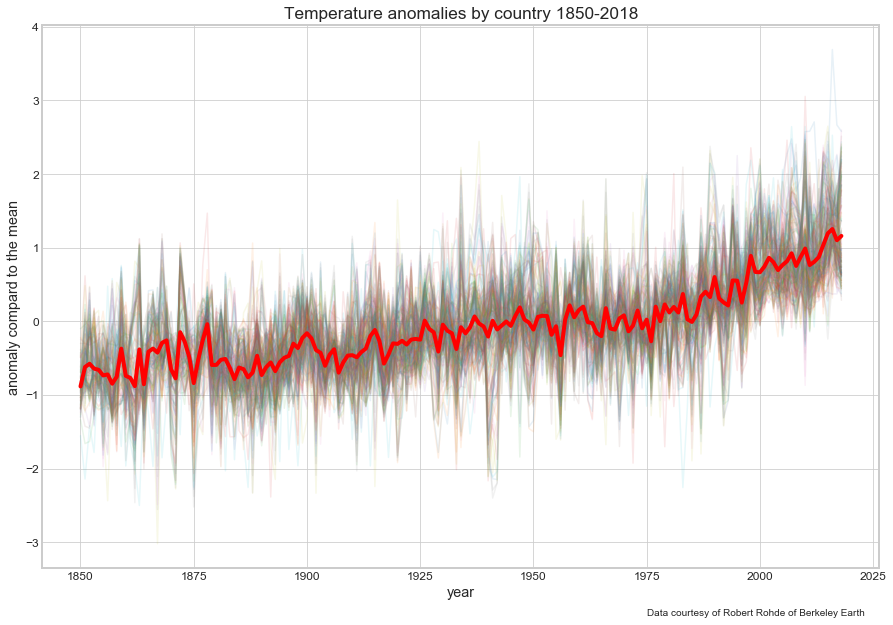

In [4]:
#plot temperature data
plt.figure(figsize=[15,10])
for i in T.keys():
    plot(T[i],alpha=.1)

plot(T.mean(axis=1,numeric_only=True),'r',linewidth=4)
plt.xlabel('year')
plt.ylabel('anomaly compard to the mean');
plt.title('Temperature anomalies by country 1850-2018');
plt.text(x=1975,y=-4,s='Data courtesy of Robert Rohde of Berkeley Earth');



In [149]:
#choose photo 

(_, _, filenames) = next(walk('./images/'))

image_choice = widgets.Dropdown(
    options=filenames,
    description='Photo: ',
    disabled=False,
)

display(image_choice)

Dropdown(description='Photo: ', options=('IMG_4663.JPG', 'glaciersunset.JPG', 'dan.jpg', '.DS_Store', 'IMG_499…

In [6]:
#choose country of photo


choice = widgets.Dropdown(
    options=T.keys(),
    description='Country: ',
    disabled=False,
)
display(choice)

Dropdown(description='Country: ', options=('Antigua and Barbuda', 'Barbados', 'Belize', 'Canada', 'Costa Rica'…

In [7]:
#calculate number of warm vs cold anomalies since 1950

cutoff = 1950

a_diff = T[choice.value][(T[choice.value] > 0) & (T.index > cutoff)].count() - T[choice.value][(T[choice.value] < 0) & (T.index > cutoff)].count()

if a_diff > 0:
    print("%s has had a *warming anomaly*: %s more years above average than below since 1950" %(choice.value, a_diff))
else:
    print("%s has had a cooling anomaly: %s more years below average than above since 1950" %(choice.value,a_diff))


United States of America has had a *warming anomaly*: 28 more years above average than below since 1950


In [8]:
#glitch roulette 
choices()

 add_pix_line(img, n) 
 add_rainbow(img, max_width=500, max_height=500) 
 cut_and_paste(img,n) 
 repeat_pix_line(img, n) 
 skybo(img) 
 redshadows(img) 
 chaos(img)


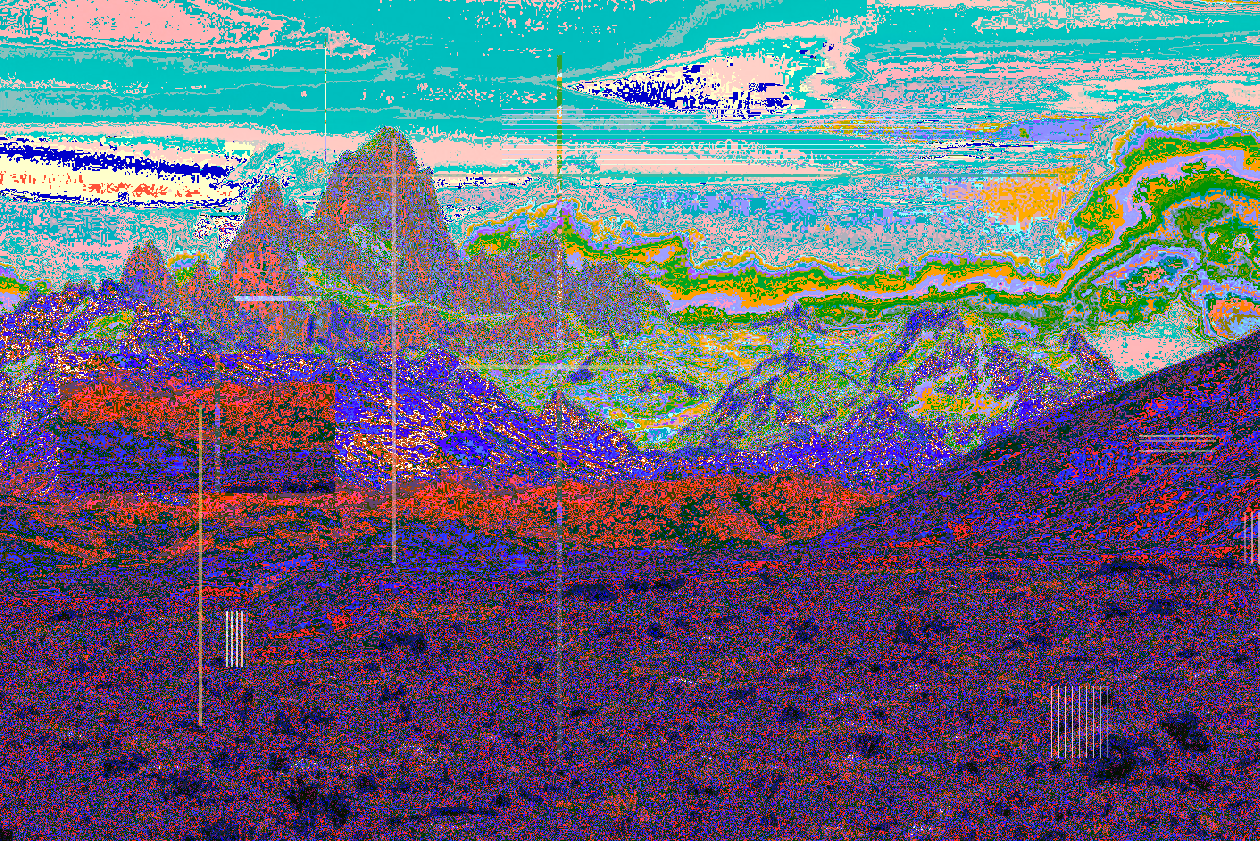

In [164]:
#load photo & climate glitch
try:  
    img  = Image.open('./images/'+ image_choice.value) 
except IOError: 
    pass

#resize image
img = img.resize((round(img.width/4), round(img.height/4)))

#add transparent channel
alpha=Image.new('L', img.size, color=255)
img.putalpha(alpha)


#load individual pixels
px = img.load()

j = 0

for i in range(a_diff):
    
    k = random.random()
    if k < a_diff/100:
        n = random.randint(1,round(a_diff/3))
        img = add_pix_line(img, n)
    
    k = random.randint(0,10)
    if k == 0:
        if j < 2:
            img = add_rainbow(img,100,5)
            j += 1
    elif k == 1 or k==2:
        img = repeat_pix_line(img, random.randint(4,12))
    elif k == 3 or k==4:
        img = cut_and_paste(img,1)
    
    k = random.random()*2
    if k < a_diff/100:
        img = skybo(img)
        
    k = random.random()*5
    if k < a_diff/100:
        img = add_pixel(img)
        
#     k = random.random()*5
#     if k < a_diff/100:
#         img = redshadows(img)    
        
    k = random.random()*5
    if k < a_diff/100:
        img = bog(img)    

    
img